In [1]:
import neuroseries as nts

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import scipy.signal
import scipy.stats

import bk.load
import bk.plot
import bk.compute
import bk.signal

In [2]:
def main(base_folder,local_path,*args,**kwargs):
    bk.load.current_session_linux(base_folder,local_path)
    neurons, metadata = bk.load.spikes()

    states = bk.load.states()

    point_spectrum = {}
    for stru in np.unique(metadata.Region):
        point_spectrum.update({stru:{}})
        actmat = bk.compute.binSpikes(neurons[(metadata.Region == stru) & (metadata.Type == 'Pyr')],binSize=0.025,fast=True,as_Tsd=True)
        for i,state in states.items():
            fr = np.sum(actmat.restrict(state).values.T,0)
            f,sxx = scipy.signal.welch(fr,1/0.025,nperseg = 1000,noverlap = 750)
            f,sxx = bk.signal.flatten_spectrum(f,sxx,[0.1,20])
            point_spectrum[stru].update({i:sxx})

    return f,point_spectrum



In [3]:
def merge(batch):
    point_spectrum = {}
    for session,b in batch.items():
        f = b[0]
        for stru in b[1]:
            if stru not in point_spectrum.keys(): point_spectrum.update({stru:{}})
            for state in b[1][stru]:
                if state not in point_spectrum[stru].keys(): point_spectrum[stru].update({state:[]})
                point_spectrum[stru][state].append(b[1][stru][state])

    for stru in point_spectrum:
        for state in point_spectrum[stru]:
            point_spectrum[stru][state] = np.vstack(point_spectrum[stru][state])
    return f, point_spectrum

In [4]:
batch = bk.load.batch(main)
f, point_spectrum = merge(batch[0])

100%|██████████| 61/61 [13:08<00:00, 12.93s/it]

Batch finished in 788.5112102031708
Some session were not processed correctly
['Rat08-20130720', 'Rat08-20130722', 'Rat09-20140328', 'Rat09-20140403', 'Rat09-20140407', 'Rat09-20140408', 'Rat09-20140409', 'Rat10-20140622', 'Rat10-20140629', 'Rat10-20140701', 'Rat10-20140702', 'Rat10-20140703', 'Rat10-20140704', 'Rat10-20140705', 'Rat10-20140708', 'Rat11-20150310', 'Rat11-20150312', 'Rat11-20150313', 'Rat11-20150321', 'Rat11-20150323', 'Rat11-20150325', 'Rat11-20150326', 'Rat11-20150402', 'Rat11-20150403']
39.34426229508197 %


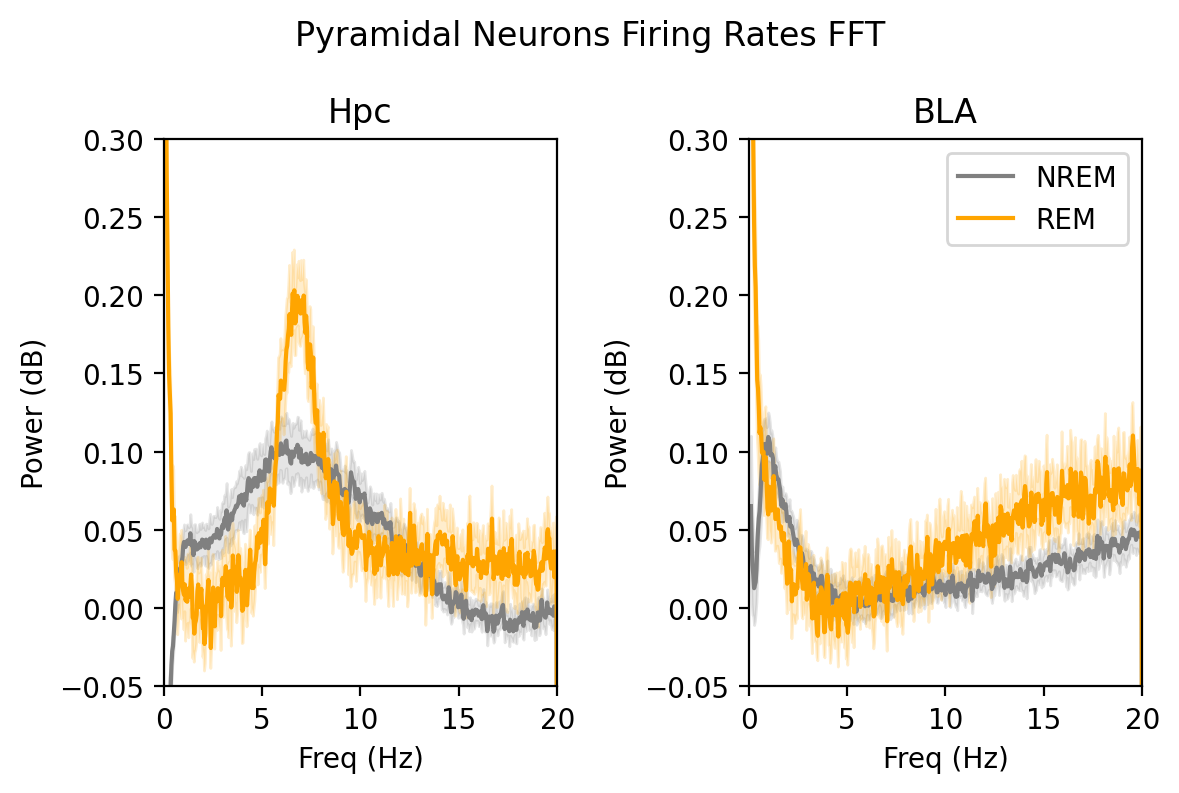

In [10]:
fig,axes = plt.subplots(1,2,dpi= 200)
for s,ax in zip(['Hpc','BLA'],axes):
    for state,c in zip(['sws','Rem'],['grey','orange']):
        bk.plot.confidence_intervals(f,point_spectrum[s][state],c,ax)
        ax.set_title(s)
        ax.set_ylim(-0.05,0.3)
        ax.set_xlim(0,20)
        ax.set_ylabel('Power (dB)')
        ax.set_xlabel('Freq (Hz)')
plt.suptitle('Pyramidal Neurons Firing Rates FFT')
plt.legend(['NREM','REM'])
plt.tight_layout()
plt.savefig('/home/billel/pCloudDrive/IFM/work/Figures/Figures_Gabrielle/PowerSpectrum/Flatten/FFT_FiringRates.svg')

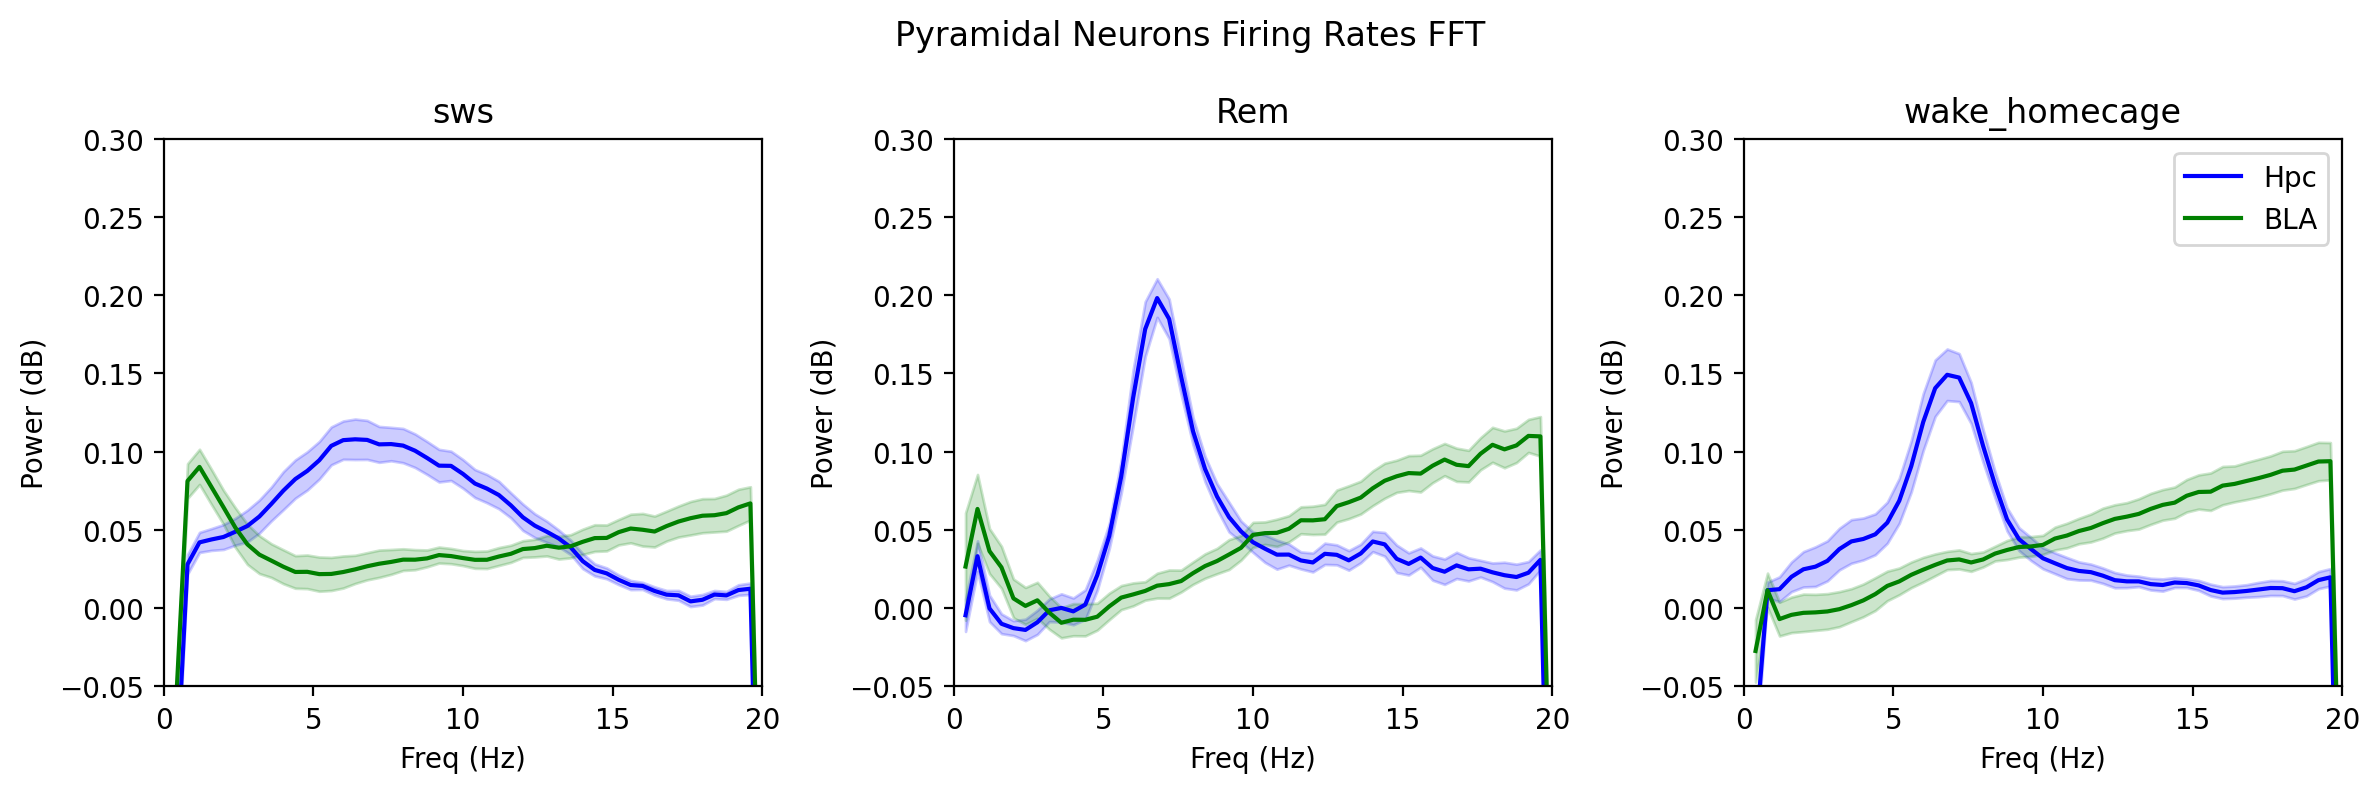

In [10]:
fig,axes = plt.subplots(1,3,figsize = (12,4),dpi = 200)
for state,ax in zip(['sws','Rem','wake_homecage'],axes):
    for s,c in zip(['Hpc','BLA'],['b','g']):
        bk.plot.confidence_intervals(f,point_spectrum[s][state],c,ax)
        ax.set_title(state)
        ax.set_ylim(-0.05,0.3)
        ax.set_xlim(0,20)
        ax.set_ylabel('Power (dB)')
        ax.set_xlabel('Freq (Hz)')
plt.suptitle('Pyramidal Neurons Firing Rates FFT')
plt.legend(['Hpc','BLA'])
plt.tight_layout()


Rat : 8 on day : 6
Working with session Rat08-20130713 @ /mnt/electrophy/Gabrielle/GG-Dataset-Light/Rat08/Rat08-20130713
Data already saved in Numpy format, loading them from here:
Rat08-20130713-neurons.npy
Rat08-20130713-metadata.npy


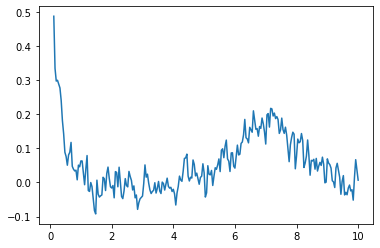

In [30]:
bk.load.current_session_linux()
neurons, metadata = bk.load.spikes()
states = bk.load.states()
actmat = bk.compute.binSpikes(neurons[(metadata.Region == 'Hpc') & (metadata.Type == 'Pyr')],as_Tsd=True)
fr = np.sum(actmat.restrict(states['Rem']).values.T,0)


f,sxx = scipy.signal.welch(fr,1/0.025,nperseg = 1000)
f,sxx = bk.signal.flatten_spectrum(f,sxx,[0.1,10])
plt.plot(f,sxx)